In [ ]:
import keras
import keras.backend as K

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

import json
import pandas as pd
import numpy as np

import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install shap

In [ ]:
# importing training and test dataset: 

In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/train.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/test.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/tmp/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/tmp/test",target_size=(224,224))

Found 4760 images belonging to 3 classes.
Found 1208 images belonging to 3 classes.


In [ ]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.models import load_model
# loading model 1, the vgg16 first model using:
#load saved model from folder
model = load_model('/content/gdrive/MyDrive/capstone3_model.h5', custom_objects = {'f1_m':f1_m, 'recall_m':recall_m, 'precision_m':precision_m})
model.summary()

OSError: ignored

In [ ]:
print(model.f1_m)
print(model.recall_m)
print(model.precision_m)

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

In [ ]:
# Now, visualizing CNN layers:

In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers, optimizers
from keras import Sequential

import shap

In [ ]:
!pip install keract

In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/train.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/test.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
img_cat_1 = cv2.imread('/tmp/train/Category_1/Exp_15_T17_R3_side3_121118_0.JPG')
# img_cat_2 = cv2.imread('/tmp/train/Category_2/Yxp_25_T46_R4_sidY4_010919_2.JPG')
# img_cat_3 = cv2.imread('/tmp/train/Category_3/Zxp_15_T6_R3_sidZ1_121818_10.JPG')

In [ ]:
img_cat_1.shape[0]

3010

In [ ]:
img_cat_1.shape

(3010, 1053, 3)

In [ ]:
images = np.array([img_cat_1])

In [ ]:
images.shape

(1, 3010, 1053, 3)

conv2d_6 (1, 224, 224, 32) 


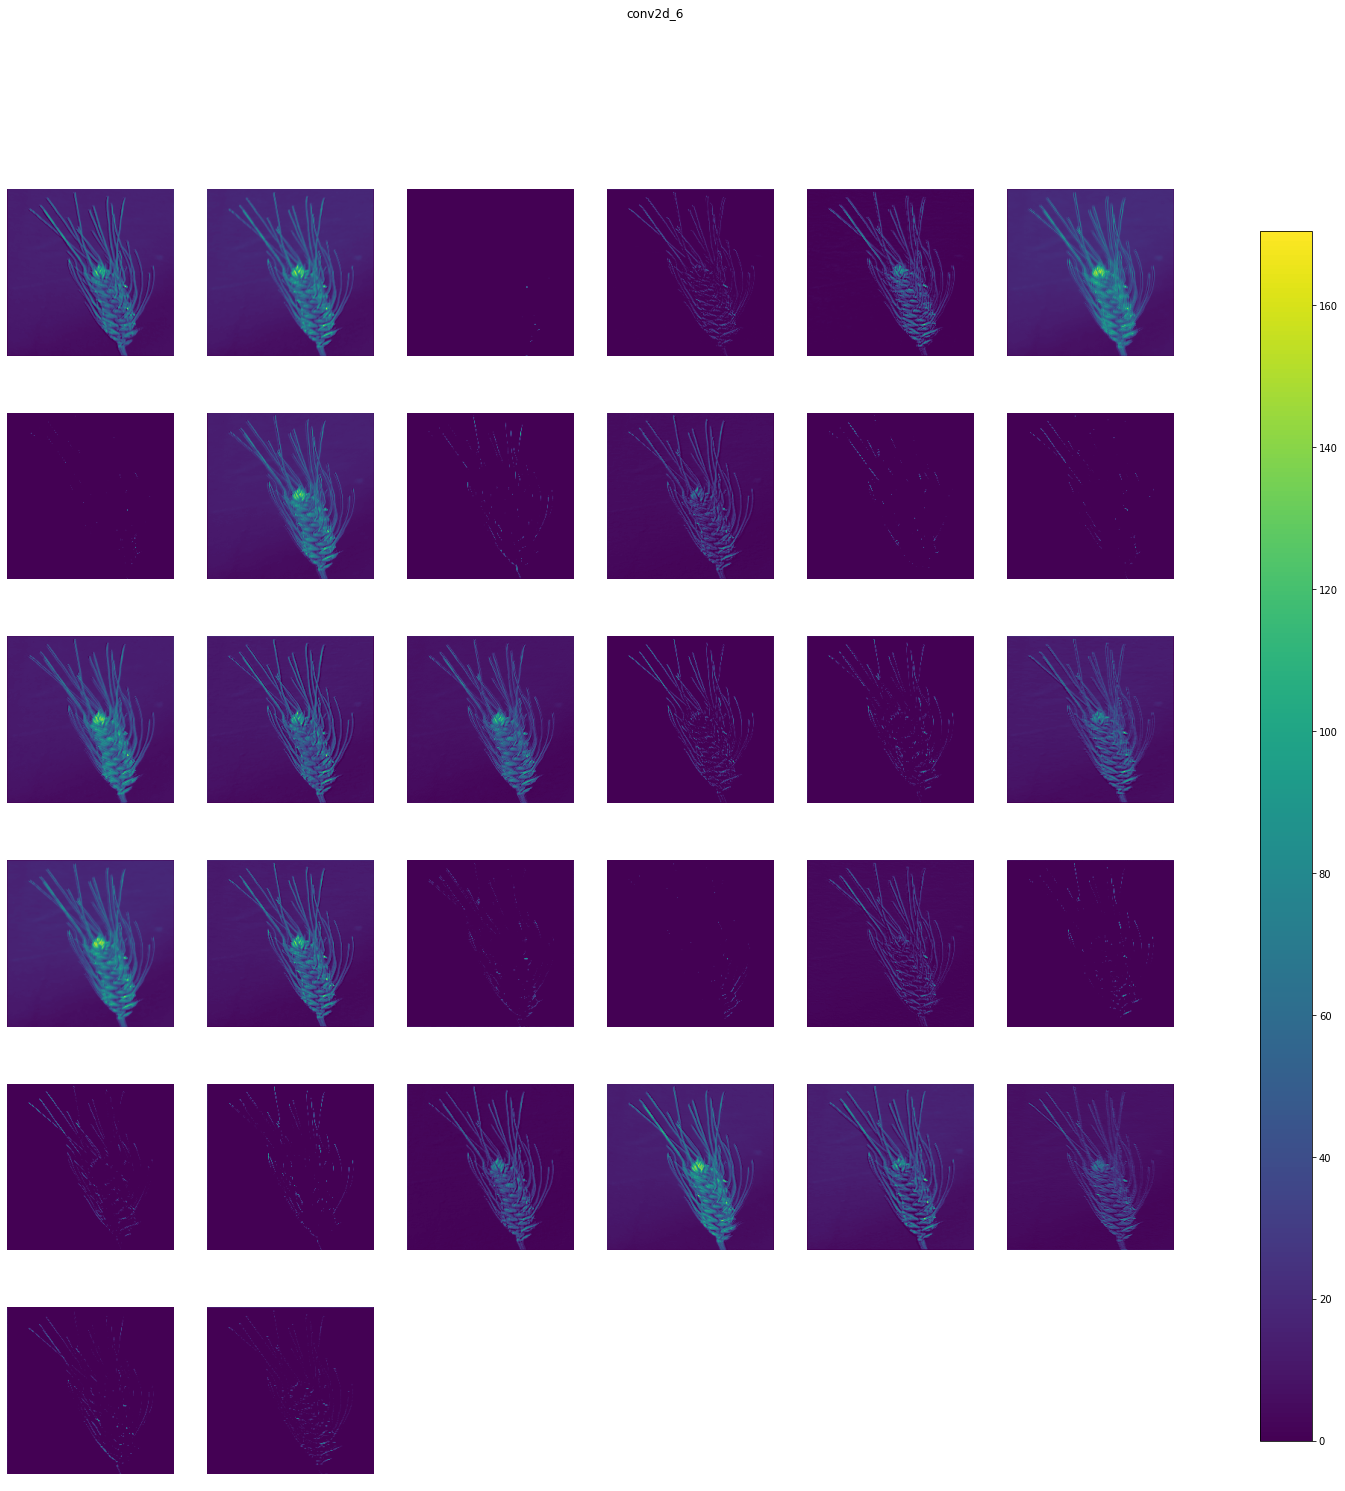

In [ ]:
from keract import get_activations, display_activations
from keract import display_heatmaps

activations = get_activations(model, images, layer_names = 'conv2d_6')
display_activations(activations, save=False)